In [1]:
import os
import pathlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv('C:/Users/Zaiba Farheen/Downloads/auto-mpg.csv')


In [5]:
# Dimension of the dataset
print("Dimension of the dataset:", df.shape)

Dimension of the dataset: (398, 9)


In [6]:
# Structure of the dataset
print("Structure of the dataset:")
print(df.head())

Structure of the dataset:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [7]:
# Summary of the dataset
print("Summary of the dataset:")
print(df.describe())

Summary of the dataset:
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [8]:
# Check for missing values in each column
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [9]:
# Handle missing values, if any
# For example, you can drop rows with missing values
df.dropna(inplace=True)

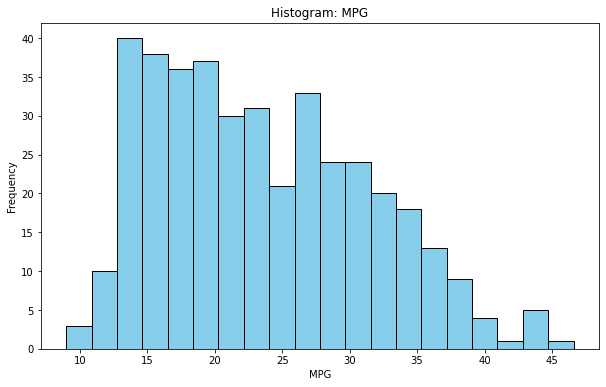

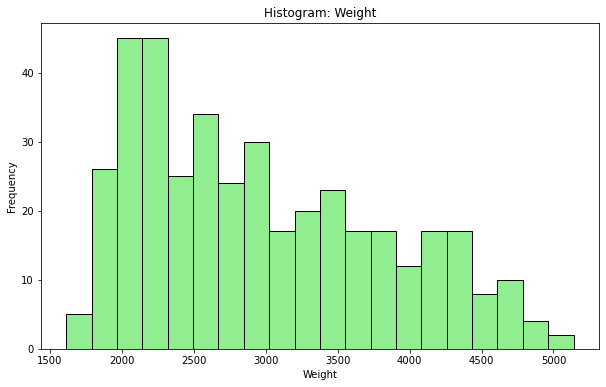

In [10]:
# Plotting histograms for two continuous variables - 'mpg' and 'weight'
plt.figure(figsize=(10, 6))
plt.hist(df['mpg'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Histogram: MPG')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['weight'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram: Weight')
plt.show()


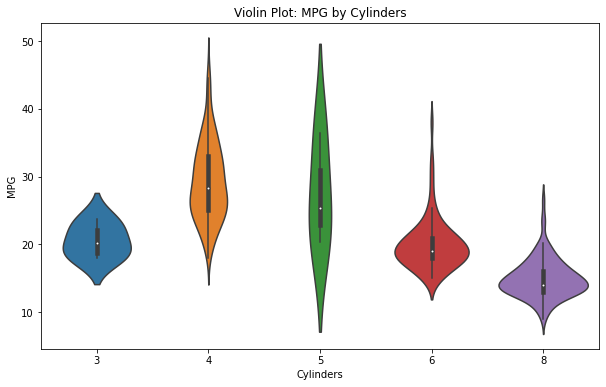

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x=df['cylinders'], y=df['mpg'])
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('Violin Plot: MPG by Cylinders')
plt.show()


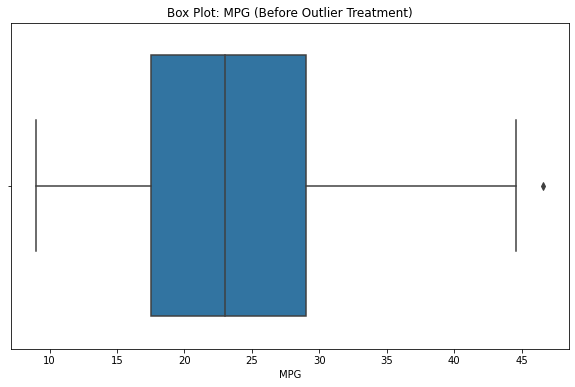

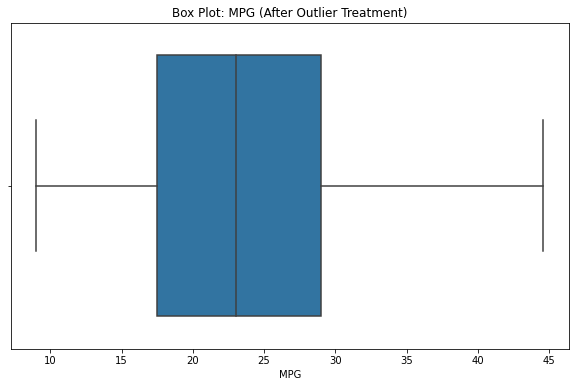

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['mpg'])
plt.xlabel('MPG')
plt.title('Box Plot: MPG (Before Outlier Treatment)')
plt.show()

# Outlier treatment by removing values beyond 1.5 times the interquartile range
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['mpg'] >= Q1 - 1.5 * IQR) & (df['mpg'] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['mpg'])
plt.xlabel('MPG')
plt.title('Box Plot: MPG (After Outlier Treatment)')
plt.show()


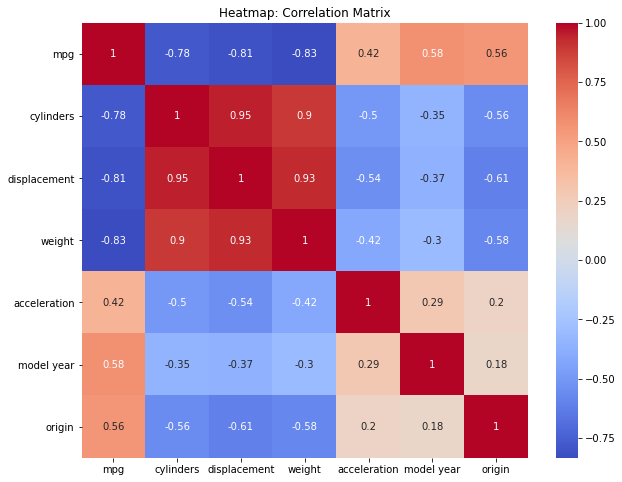

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

# Standardizing the 'mpg' and 'weight' variables
scaler = StandardScaler()
df[['mpg', 'weight']] = scaler.fit_transform(df[['mpg', 'weight']])

# Updated summary of the dataset
print("Summary of the dataset (after standardization):")
print(df.describe())


Summary of the dataset (after standardization):
                mpg   cylinders  displacement        weight  acceleration  \
count  3.970000e+02  397.000000    397.000000  3.970000e+02    397.000000   
mean  -5.198752e-16    5.458438    193.696474  1.140985e-16     15.562217   
std    1.001262e+00    1.701577    104.261395  1.001262e+00      2.758675   
min   -1.870313e+00    3.000000     68.000000 -1.607582e+00      8.000000   
25%   -7.706178e-01    4.000000    105.000000 -8.827706e-01     13.800000   
50%   -5.905018e-02    4.000000    151.000000 -1.957960e-01     15.500000   
75%    7.172054e-01    8.000000    262.000000  7.524891e-01     17.100000   
max    2.735470e+00    8.000000    455.000000  2.562744e+00     24.800000   

       model year     origin  
count  397.000000  397.00000  
mean    76.000000    1.56927  
std      3.696846    0.79985  
min     70.000000    1.00000  
25%     73.000000    1.00000  
50%     76.000000    1.00000  
75%     79.000000    2.00000  
max     82

In [15]:
#display all categorical and  numerical types
cats=list(df.select_dtypes(include=[object]).columns)
nums=list(df.select_dtypes(exclude=[object]).columns)
print("Categorical types: ",cats)
print("Numerical types: ",nums)
"""
to convert to categorical
df['mpg']=df.Categorical(df['mpg'])
"""

Categorical types:  ['horsepower', 'car name']
Numerical types:  ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']


In [17]:
#standardize dataset for numercial attributes
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
#standardize the dataset for numerical attributes
columns_to_scale = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']

df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])


In [19]:
#Interquartile range(IQR) Method
#Calculate the outlier for the variable call failure
Q1=df['mpg'].quantile(0.25)
Q3=df['mpg'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
print(lower_whisker,upper_whisker)

0.23876404494382023
0.5617977528089888
0.3230337078651686
-0.24578651685393269 1.0463483146067416


In [21]:
#To remove the outlier
churn=df[df['mpg']<upper_whisker]

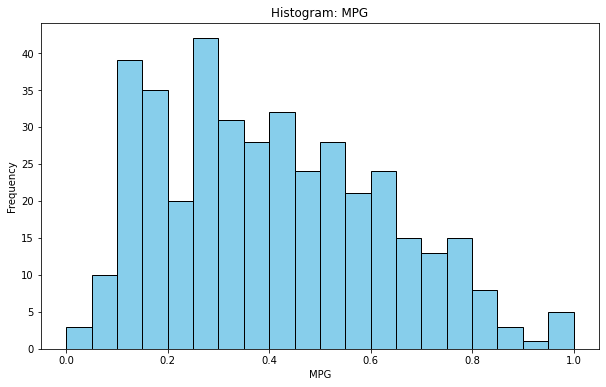

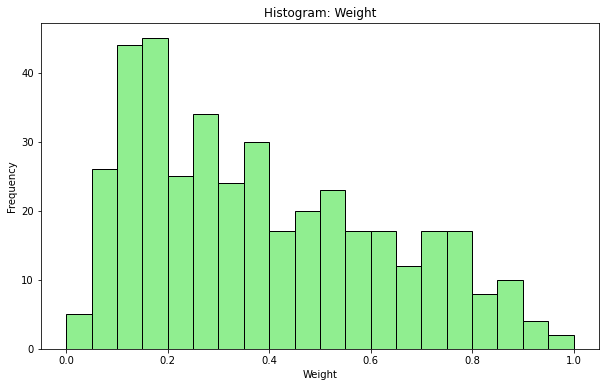

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['mpg'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Histogram: MPG')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['weight'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram: Weight')
plt.show()


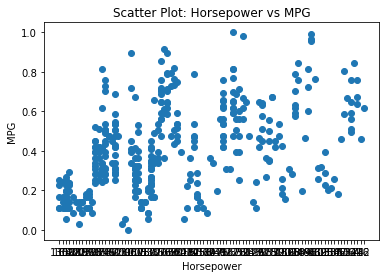

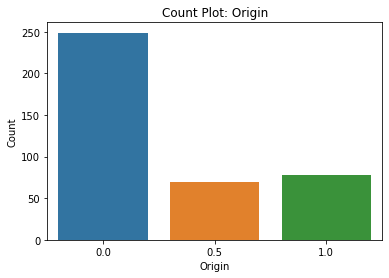

In [26]:
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Scatter Plot: Horsepower vs MPG')
plt.show()# Finding and Displaying the Frequency of Categorical Values using a Count Plot:


sns.countplot(x='origin', data=df)
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Count Plot: Origin')
plt.show()


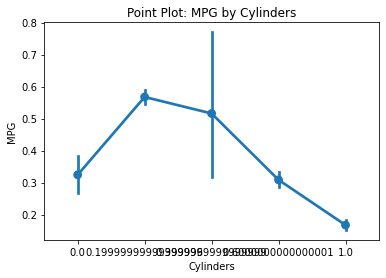

In [27]:
sns.pointplot(x='cylinders', y='mpg', data=df)
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('Point Plot: MPG by Cylinders')
plt.show()
